In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading And Viewing Datasets:

In [2]:
blobs = pd.read_csv('cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

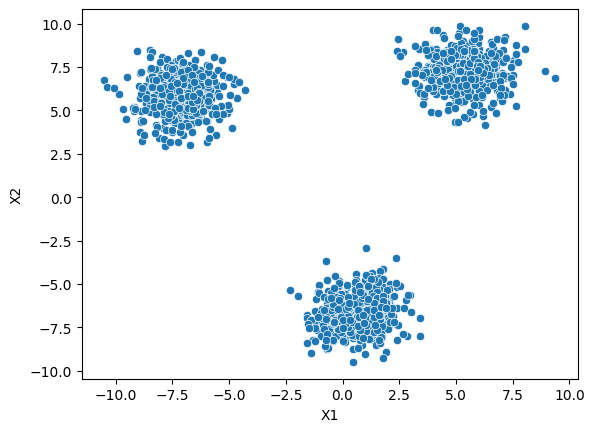

In [ ]:
sns.scatterplot(data = blobs, x = 'X1', y = 'X2')
#Both DBSCAN and K-Means Clustering should be able to identify roughly the same clusters with this dataset

In [5]:
moons = pd.read_csv('cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

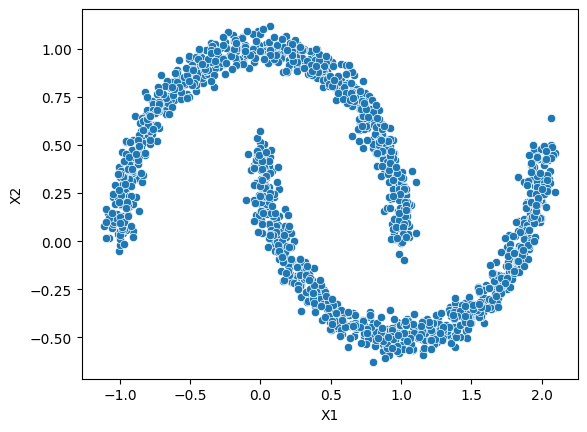

In [ ]:
sns.scatterplot(data = moons, x = 'X1', y = 'X2')
#K-Means will likely find cluster this dataset wrong, while DBSCAN will do so right

In [8]:
circles = pd.read_csv('cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

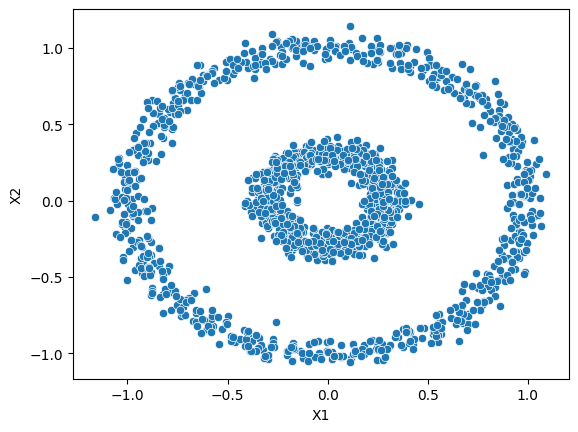

In [ ]:
sns.scatterplot(data = circles, x = 'X1', y = 'X2')
#K-Means will also likely struggle with this one while DBSCAN won't

Creating A Cluster Display Function:

In [11]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = 'Set1')

Clustering Attempts With K-Means:

In [12]:
from sklearn.cluster import KMeans

In [13]:
model = KMeans(n_clusters = 3) #For blobs dataset

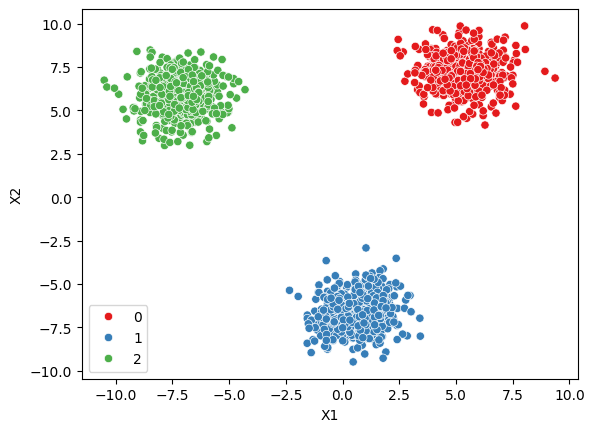

In [ ]:
display_categories(model, blobs)
#K-Means performs well on this dataset, finding the 3 blobs as 3 unique clusters

In [ ]:
model = KMeans(n_clusters = 2) #For moons and circles datasets

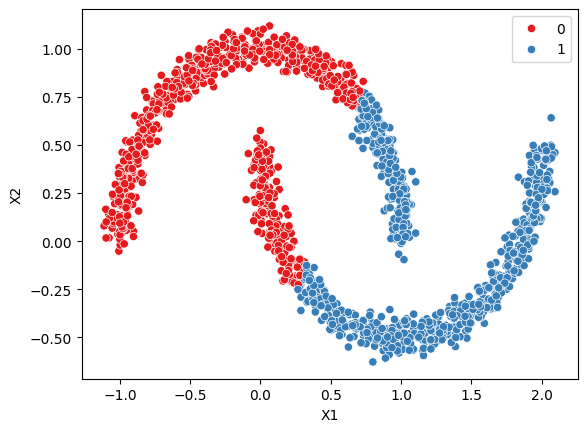

In [ ]:
display_categories(model, moons)
#K-Means did not see the moons in this dataset. Instead, it cut the data in half near the middle of the X1 axis
#Remember: K-Means uses distance as the metric to determine which points belong to which cluster

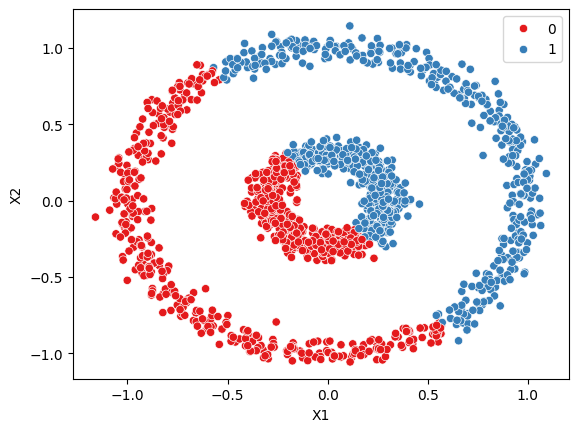

In [ ]:
display_categories(model, circles)
#K-Means also struggles with the circles, splitting it in half by an imaginary line that appears at a random angle based on the random state

Clustering With DBSCAN:

In [18]:
from sklearn.cluster import DBSCAN
#Unlike K-Means and Hierarchical Clustering, DBSCAN uses density as the metric to cluster data points

In [19]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |   

In [20]:
model = DBSCAN() #For now, we will use a default DBSCAN model, whose eps(epsilon) = 0.5 and min_samples = 5
#You'll see what these parameters mean in the next notebook

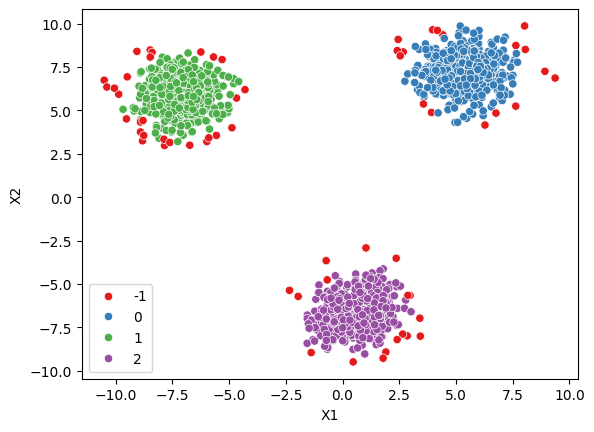

In [ ]:
display_categories(model, blobs)
#Notice that DBSCAN not only determines clusters, but it also has a special cluster code called '-1'
#This corresponds to the points the model determined to be outliers based on the eps and min_samples values

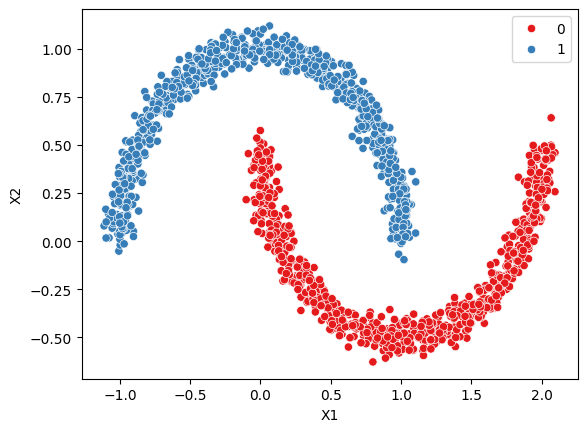

In [ ]:
model = DBSCAN(eps = 0.15)
display_categories(model, moons)
#The DBSCAN model successfully determined that based on data density, there are two separate 'moon' structures that the data comprises

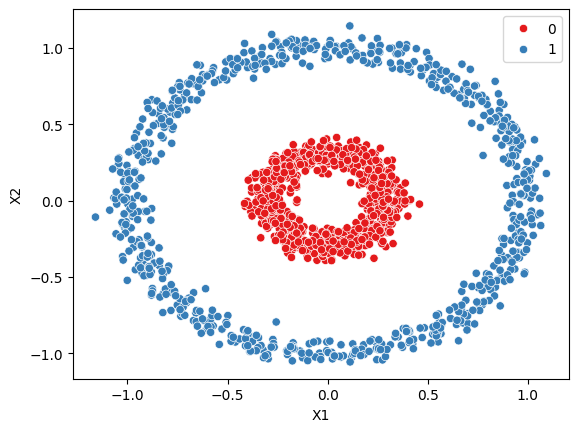

In [ ]:
model = DBSCAN(eps = 0.15)
display_categories(model, circles)
#Another example where DBSCAN outperforms K-Means